# Creating final data for crop and fertilizer recommendation system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [3]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.50
1,1,rice,80,40,40,5.52
2,2,rice,80,40,40,5.54
3,3,rice,80,40,40,5.56
4,4,rice,80,40,40,5.58


In [4]:
del merge_fert['Unnamed: 0']

In [5]:
merge_fert.describe()

,N,P,K,pH
count,1254.000000,1254.000000,1254.000000,1254.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.494915,31.896581,50.529949,0.587299
min,20.000000,10.000000,10.000000,3.820000
25%,20.000000,20.000000,20.000000,5.320000
50%,30.000000,40.000000,30.000000,5.480000
75%,80.000000,60.000000,50.000000,5.620000
max,120.000000,125.000000,200.000000,6.680000


In [6]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

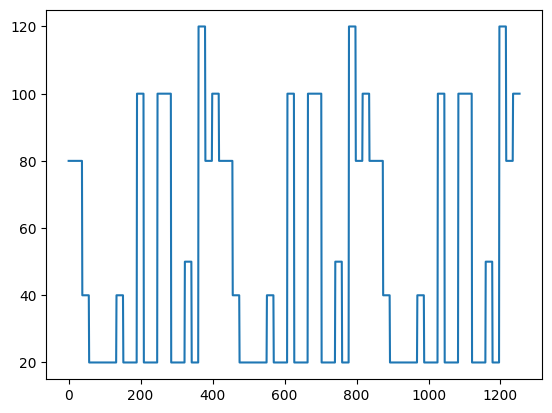

In [7]:
plt.plot(merge_fert["N"])

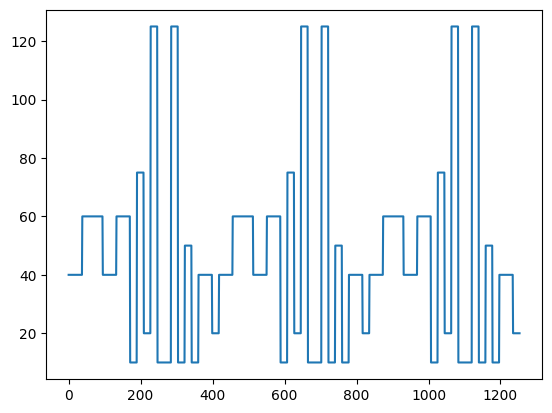

In [8]:
plt.plot(merge_fert["P"])

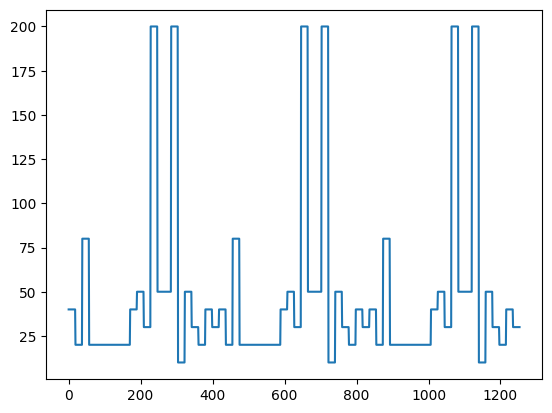

In [9]:
plt.plot(merge_fert["K"])

In [11]:
print(merge_fert.dtypes)

Crop     object
N         int64
P         int64
K         int64
pH      float64
dtype: object


Crop     object
N         int64
P         int64
K         int64
pH      float64
dtype: object


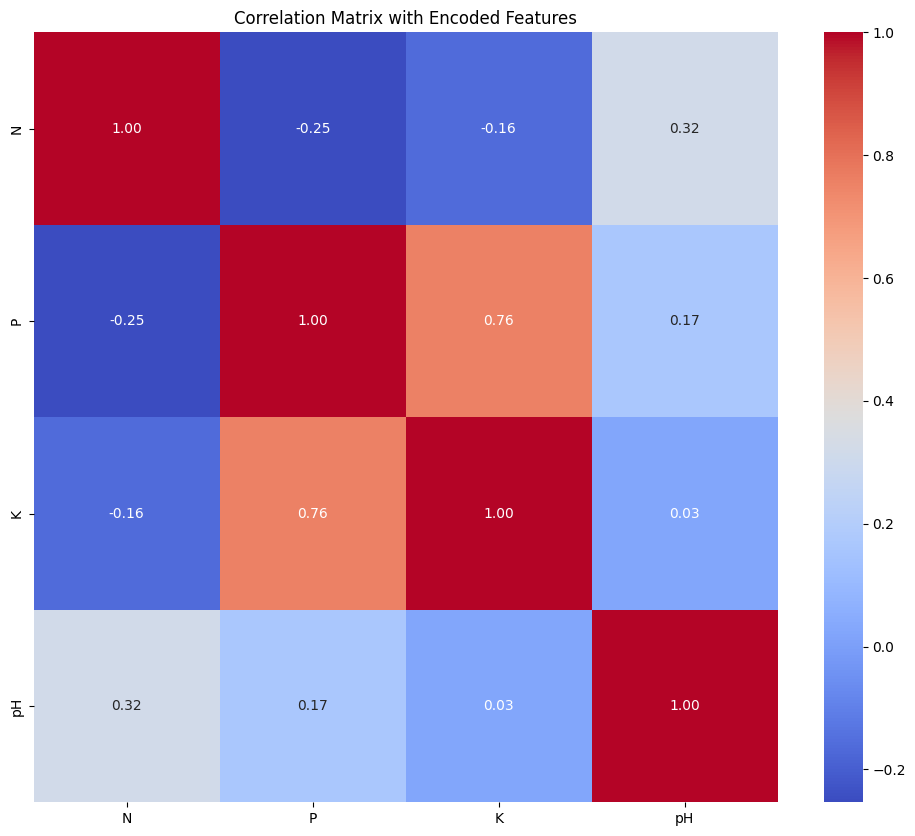

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(merge_fert.dtypes)

merge_fert_encoded = pd.get_dummies(merge_fert, drop_first=True)

numeric_df_encoded = merge_fert_encoded.select_dtypes(include=[np.number])

if numeric_df_encoded.empty:
    print("No numeric columns available for correlation.")
else:
    correlation_matrix_encoded = numeric_df_encoded.corr()
  
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix with Encoded Features')
    plt.show()



In [17]:
# sns.heatmap(merge_fert.corr(),annot=True)

In [18]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [20]:
import pandas as pd
import random

temp_list = []

for i in range(merge_crop.shape[0]):
    crop = merge_crop['label'].iloc[i]
    
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)
    
    temp_list.append({"N": N, "P": P, "K": K})

temp = pd.DataFrame(temp_list, columns=['N', 'P', 'K'])

print(temp.head())


    N   P   K
0  87  56  42
1  86  45  44
2  93  42  36
3  72  37  45
4  87  38  39


In [21]:
# #Add +/-3 for every NPK value
# import random
# temp = pd.DataFrame(columns = ['N','P','K'])
# for i in range(0,merge_crop.shape[0]):
#     crop = merge_crop.label.iloc[i]
#     #print(crop)
#     N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
#     P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
#     K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
#     d = {"N":N,"P":P,"K":K}
#     #print(d)
#     temp = temp.append(d,ignore_index = True)

In [22]:
temp

,N,P,K
0,87,56,42
1,86,45,44
2,93,42,36
3,72,37,45
4,87,38,39
...,...,...,...
2195,87,35,30
2196,118,39,35
2197,112,24,34
2198,118,35,31


In [23]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [24]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,87,56,42
1,1,21.770462,80.319644,7.038096,226.655537,rice,86,45,44
2,2,23.004459,82.320763,7.840207,263.964248,rice,93,42,36
3,3,26.491096,80.158363,6.980401,242.864034,rice,72,37,45
4,4,20.130175,81.604873,7.628473,262.717340,rice,87,38,39
...,...,...,...,...,...,...,...,...,...
2195,2195,26.774637,66.413269,6.780064,177.774507,coffee,87,35,30
2196,2196,27.417112,56.636362,6.086922,127.924610,coffee,118,39,35
2197,2197,24.131797,67.225123,6.362608,173.322839,coffee,112,24,34
2198,2198,26.272418,52.127394,6.758793,127.175293,coffee,118,35,31


In [25]:
del merge_crop['Unnamed: 0']

In [26]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,87,56,42
1,21.770462,80.319644,7.038096,226.655537,rice,86,45,44
2,23.004459,82.320763,7.840207,263.964248,rice,93,42,36
3,26.491096,80.158363,6.980401,242.864034,rice,72,37,45
4,20.130175,81.604873,7.628473,262.717340,rice,87,38,39
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,87,35,30
2196,27.417112,56.636362,6.086922,127.924610,coffee,118,39,35
2197,24.131797,67.225123,6.362608,173.322839,coffee,112,24,34
2198,26.272418,52.127394,6.758793,127.175293,coffee,118,35,31


In [27]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [28]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [29]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [30]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,87,56,42,20.879744,82.002744,6.502985,202.935536,rice
1,86,45,44,21.770462,80.319644,7.038096,226.655537,rice
2,93,42,36,23.004459,82.320763,7.840207,263.964248,rice
3,72,37,45,26.491096,80.158363,6.980401,242.864034,rice
4,87,38,39,20.130175,81.604873,7.628473,262.717340,rice


In [31]:
df.shape

(2200, 8)